In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

from copy import copy

def show_image(image):
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

### **a)** Read the name of a file containing an image in `jpg` format and show it in a window, whose name is the name of the file. Test whether the image was successfully read. Display the height and width of the image, on the console.

Width: 240
Height: 240


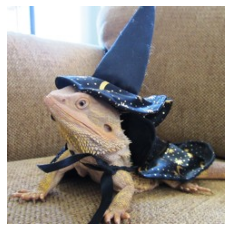

In [5]:
filename = "Images/lizard.jpg"
image = cv2.imread(filename)

print(f"Width: {image.shape[0]}")
print(f"Height: {image.shape[1]}")

show_image(image)

### **b)** Read a color image from a file in `jpg` format and save it in `bmp` format.

In [3]:
cv2.imwrite("Images/2.bmp", image);

### **c)** Read a color image from a file, show the mouse cursor over the image, and the coordinates and RGB components of the pixel under the cursor. When the user clicks on the mouse, let him modify the RGB components of the selected pixel.

In [4]:
def mouseRGB(event, x, y, flags, param):
    font = cv2.FONT_HERSHEY_SIMPLEX
    b = image[y, x, 0]
    g = image[y, x, 1]
    r = image[y, x, 2]
    color = f"{r}, {g}, {b}"

    if event == cv2.EVENT_LBUTTONDOWN:
        image[y, x, 2] = int(input("R (0-255): "))
        image[y, x, 1] = int(input("G (0-255): "))
        image[y, x, 0] = int(input("B (0-255): "))
        
        print()

    img_copy = copy(image)
    cv2.putText(img_copy, color, (x, y), font, 1, (255, 255, 0), 2)
    cv2.imshow(filename, img_copy)

cv2.namedWindow(filename)
cv2.setMouseCallback(filename, mouseRGB)
cv2.imshow(filename, image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### **d)** Read an image from a file, allow the user to select a region of interest (ROI) in the image, by clicking on two points that identify two opposite corners of the selected ROI, and save the ROI into another file.

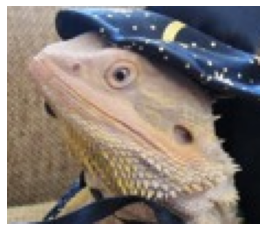

In [6]:
roi = cv2.selectROI(image)
selected = image[roi[1]:roi[1] + roi[3], roi[0]:roi[0] + roi[2]]

show_image(selected)

cv2.destroyAllWindows()